In [80]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [81]:
# Read CSV
original_city_data_df = pd.read_csv("raw_data/city_data.csv")
ride_data_df = pd.read_csv("raw_data/ride_data.csv")

original_city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [82]:
#Port James is listed twice in city data. Going to remove duplicate 
#while aggregating the number of drivers for that city
city_data_df = original_city_data_df.groupby(['city', 'type']).sum()

#Resetting index before merging datagroups
city_data_df = city_data_df.reset_index()
city_data_df.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [83]:
# Merge our two data frames together
combined_cityride_data = pd.merge(city_data_df, ride_data_df, on="city")

#ride_data_df.count()
combined_cityride_data.count()

city            2375
type            2375
driver_count    2375
date            2375
fare            2375
ride_id         2375
dtype: int64

In [84]:
#Calculating average fare per city
average_fare_df = ride_data_df.groupby("city").mean()
#Resetting index to help with merging later
average_fare_df = average_fare_df.reset_index()
#Renaming fare column into average fare
average_fare_df = average_fare_df.rename(columns={'fare': 'Average Fare'})
#Deleting unnecessary column
#del average_fare_df['ride_id']
average_fare_df = average_fare_df.drop(['ride_id'], axis=1)
average_fare_df.head()


,city,Average Fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [85]:
#Calculating total number of rides per city
ride_count_df = ride_data_df.groupby("city").count()
ride_count = ride_count_df['fare']
#Resetting index to help with merging later
ride_count_df = ride_count_df.reset_index()
#Renaming fare column into average fare
ride_count_df = ride_count_df.rename(columns={'fare': 'Total Number of Rides'})
#Deleting unnecessary columns. Del is a python method, while drop is a pandas one
#del ride_count_df['ride_id']
ride_count_df = ride_count_df.drop(['ride_id', 'date'], axis=1)
ride_count_df.head()


,city,Total Number of Rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [86]:
#Calculating total Number of Drivers per city and city type
#This data is already provided on the city data csv in the driver_count column, 
#but had to cleaned up the city that appeared more than once
citytype_and_driver_count_df = city_data_df.rename(columns={'driver_count': 'Total Number of Drivers', 
                                                            'type': 'City Type' })
citytype_and_driver_count_df.head()

,city,City Type,Total Number of Drivers
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [87]:
#Create dataframe to be visualized
#bubble_plot_df = pd.merge(average_fare_df, ride_count_df, on="city")
bubble_plot_df = pd.merge(average_fare_df, pd.merge(ride_count_df, citytype_and_driver_count_df, on='city'), on='city')
#Adding a new column 'Total Fare per City' with the result of multiplying 'Average Fare' by number of rides
bubble_plot_df['Total Fare per City'] = bubble_plot_df['Average Fare'] * bubble_plot_df['Total Number of Rides']
bubble_plot_df.head()
#pd.merge(pd.merge(df1,df2,on='name'),df3,on='name')

,city,Average Fare,Total Number of Rides,City Type,Total Number of Drivers,Total Fare per City
0,Alvarezhaven,23.928710,31,Urban,21,741.79
1,Alyssaberg,20.609615,26,Urban,67,535.85
2,Anitamouth,37.315556,9,Suburban,16,335.84
3,Antoniomouth,23.625000,22,Urban,21,519.75
4,Aprilchester,21.981579,19,Urban,49,417.65


In [99]:
bubble_plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 6 columns):
city                       125 non-null object
Average Fare               125 non-null float64
Total Number of Rides      125 non-null int64
City Type                  125 non-null object
Total Number of Drivers    125 non-null int64
Total Fare per City        125 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.8+ KB


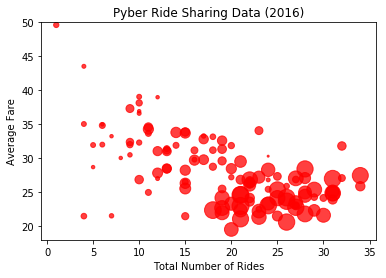

In [110]:
#Using the built-in plot function for pandas data frames. Next cell uses Seaborn instead
#Somehow I cannot use s='Total Number of Drivers', instead I have to pass 
#the values from the data frame
bubble_plot_df.plot(kind='scatter', x='Total Number of Rides', y='Average Fare', c='r', 
                    s=bubble_plot_df['Total Number of Drivers']*4, 
                    title = 'Pyber Ride Sharing Data (2016)', ylim=(18,50), alpha=0.75)


plt.show()
#bubble_plot_df.info()

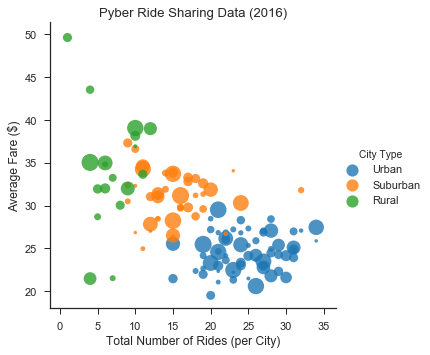

In [116]:
#Seaborn seems to have an easier way to use different colors for each city type
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Total Number of Rides', # Horizontal axis
           'Average Fare', # Vertical axis
           data=bubble_plot_df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="City Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": bubble_plot_df['Total Number of Drivers']*4}) # S marker size
# Set title
plt.title('Pyber Ride Sharing Data (2016)')
# Set x-axis label
plt.xlabel('Total Number of Rides (per City)')
# Set y-axis label
plt.ylabel('Average Fare ($)')
plt.show()

#### Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

city_types = bubble_plot_df.groupby('City Type').sum()
fares_per_citytype = city_types[['Total Fare per City']]
rides_per_citytype = city_types[['Total Number of Rides']]
drivers_per_citytype = city_types[['Total Number of Drivers']]
city_types.head()

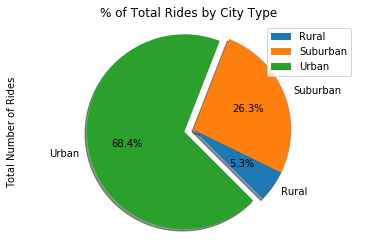

In [73]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

rides_per_citytype.plot(kind='pie', subplots = True, explode=explode, autopct="%1.1f%%", shadow=True, startangle=-45)
# Set a title for the chart
plt.title("% of Total Rides by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()


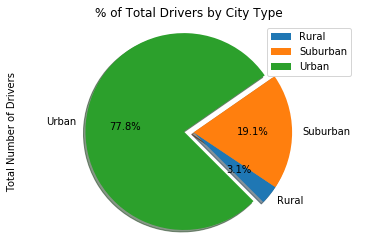

In [74]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

drivers_per_citytype.plot(kind='pie', subplots = True, explode=explode, autopct="%1.1f%%", shadow=True, startangle=-45)
# Set a title for the chart
plt.title("% of Total Drivers by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()

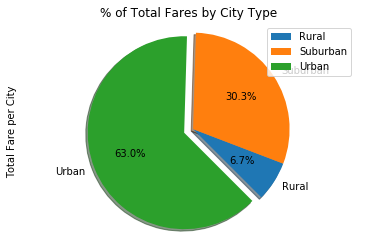

In [75]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

fares_per_citytype.plot(kind='pie', subplots = True, explode=explode, autopct="%1.1f%%", shadow=True, startangle=-45)
# Set a title for the chart
plt.title("% of Total Fares by City Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()